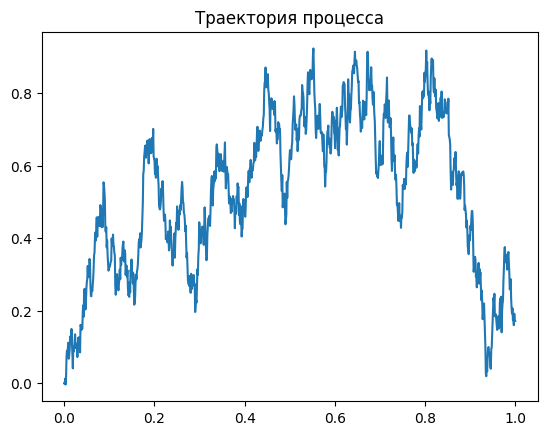

Статистика и p-value критерия Пирсона независимости:  -0.10297166469357304 0.4767135232748226


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import linalg
import statistics as st
import pandas as pd
#1#

def Brownian_motion(t, n, sample):
  S = 0
  for i in range(1, n):
    S+=math.sqrt(2)*sample[i]*np.sin(np.pi*(i-1/2)*t)/(np.pi*(i-1/2))
  return S

n = 10000
m = 1000
t = np.linspace(0, 1, m)
W = []
norm = ss.norm.rvs(0, 1, size = n+1)
for i in range(len(t)):
  W.append(Brownian_motion(t[i], n, norm))
plt.title("Траектория процесса")
plt.plot(t, W)
plt.show()

#Независимость разностей#
X_1 = []
X_2 = []
for i in range(1,int(m/20 + 1)):
  X_1.append(W[i]-W[i-1])
for i in range(int(m/20 + 1), int(m/10 + 1)):
  X_2.append(W[i]-W[i-1])
res = ss.pearsonr(X_1, X_2)
print("Статистика и p-value критерия Пирсона независимости: ", res.statistic, res.pvalue)

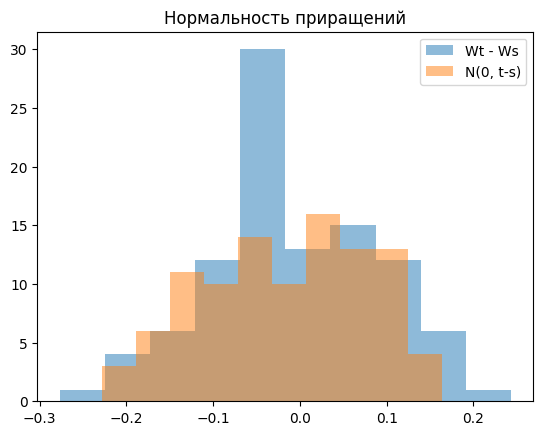

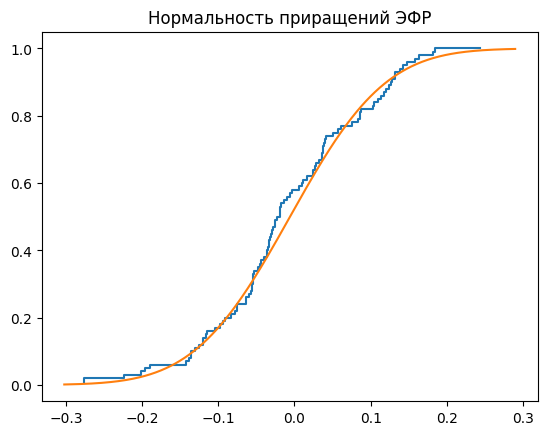

Критерий Колмогорова  0.11 0.5830090612540064


In [ ]:
#Нормальность#
from statsmodels.distributions.empirical_distribution import ECDF

l = 100
Y = []
n = 100
m = 100
t = np.linspace(0, 1, m)
for j in range(l):
  norm = ss.norm.rvs(0, 1, size = n+1)
  for i in range(len(t)):
    W.append(Brownian_motion(t[i], n, norm))
  Y.append(W[int(m/2) - 1] - W[int(m/2)])
  W = []

#Y = list(map(lambda x: x/math.sqrt(0.5), Y))
plt.title("Нормальность приращений")
plt.hist(Y, alpha = 0.5)
N = ss.norm.rvs(0, math.sqrt(1/m), l)
plt.hist(N, alpha = 0.5)
plt.legend(('Wt - Ws', 'N(0, t-s)'))
plt.show()

list_1 = Y
plt.title("Нормальность приращений ЭФР")
x_1 = np.arange (np.mean(list_1)-3*math.sqrt(np.var(list_1)), np.mean(list_1)+3*math.sqrt(np.var(list_1)), 0.001)
ecdf=ECDF(list_1)
plt.step(ecdf.x, ecdf.y)
plt.plot(x_1,ss.norm.cdf(x_1,np.mean(list_1),math.sqrt(np.var(list_1))))
plt.show()

print("Критерий Колмогорова ", ss.ks_2samp(Y, N).statistic, ss.ks_2samp(Y, N).pvalue)

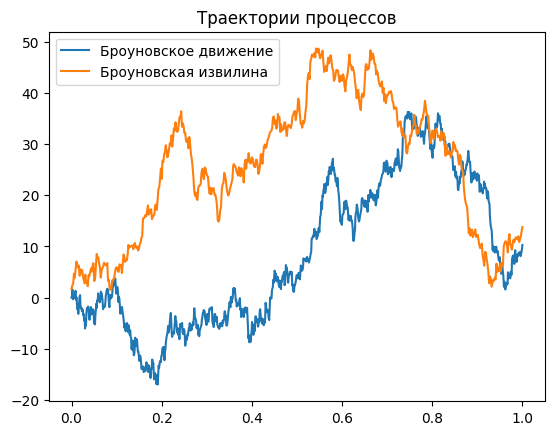

In [ ]:
#2#
n = 1000
t = np.linspace(0, 1, n)
B = [0]
for i in range(n-1):
  B.append(B[-1] + ss.norm.rvs(0, 1))
plt.title("Траектории процессов")
plt.plot(t, B)


x0 = []
for i in range(1, n):
  if B[i-1]<= 0 and B[i] >= 0 :
    x0.append(i)
t0 = max(x0)

B0=[]
for i in range(t0, n):
  B0.append(B[i])
t1 = np.linspace(0, 1, n - t0)
c = 1/(1 - t[t0])
B0 = list(map(lambda x: math.sqrt(c)*x, B0))
plt.plot(t1, B0)
plt.legend(("Броуновское движение", "Броуновская извилина"))

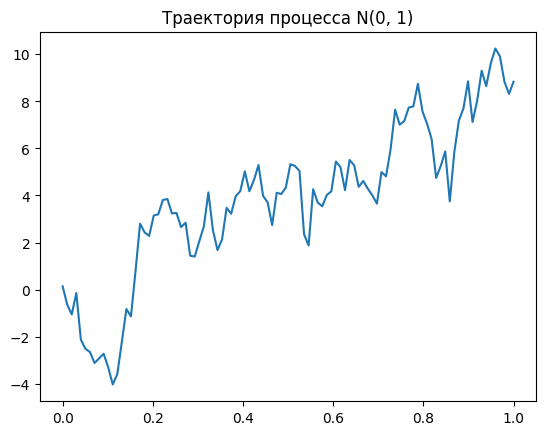

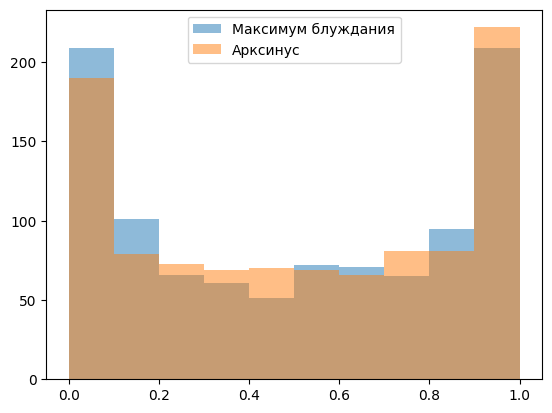

In [ ]:
def walk_norm(n):
  S = []
  for i in range(n):
    S.append(ss.norm.rvs(0, 1))
  for i in range(1, n):
    S[i] += S[i-1]
  return S
n = 100
t = np.linspace(0, 1, n)
S1 = walk_norm(n)
plt.title("Траектория процесса N(0, 1)")
plt.plot(t, S1)
plt.show()

T1 = []
m = 1000
for i in range(m):
  S = []
  S = walk_norm(n)
  T1.append(t[S.index(max(S))])
plt.hist(T1, alpha = 0.5)
plt.hist(ss.arcsine.rvs(0, 1, m), alpha = 0.5)
plt.legend(('Максимум блуждания', 'Арксинус'))

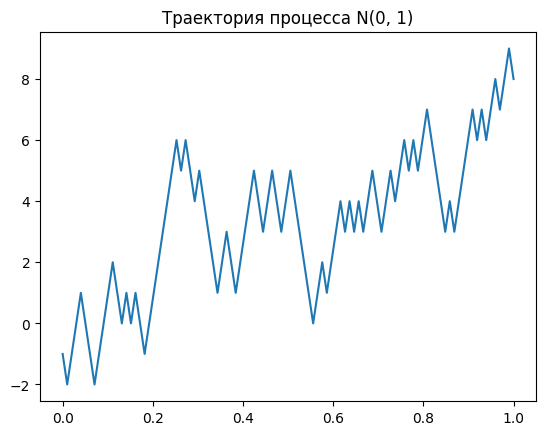

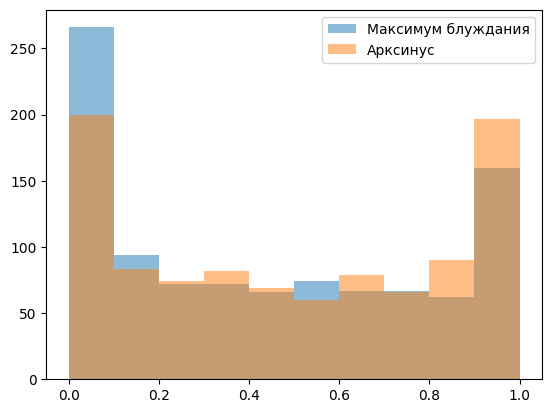

In [ ]:
def walk_bern(n):
  S = []
  for i in range(n):
    r = np.random.binomial(1, 1/2)
    if r == 1:
      S.append(1)
    else :
      S.append(-1)
  for i in range(1, n):
    S[i] += S[i-1]
  return S
n = 100
t = np.linspace(0, 1, n)
S1 = walk_bern(n)
plt.title("Траектория процесса N(0, 1)")
plt.plot(t, S1)
plt.show()

T1 = []
m = 1000
for i in range(m):
  S = []
  S = walk_bern(n)
  T1.append(t[S.index(max(S))])
plt.hist(T1, alpha = 0.5)
plt.hist(ss.arcsine.rvs(0, 1, m), alpha = 0.5)
plt.legend(('Максимум блуждания', 'Арксинус'))

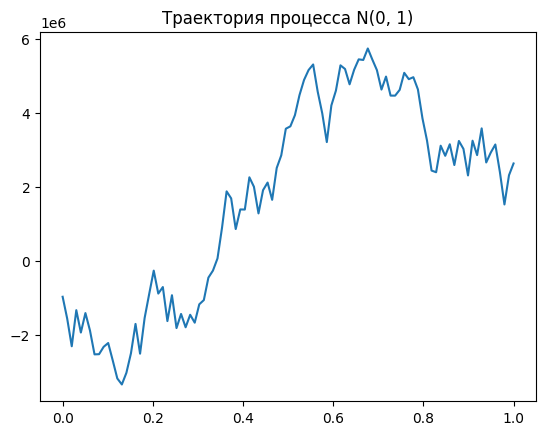

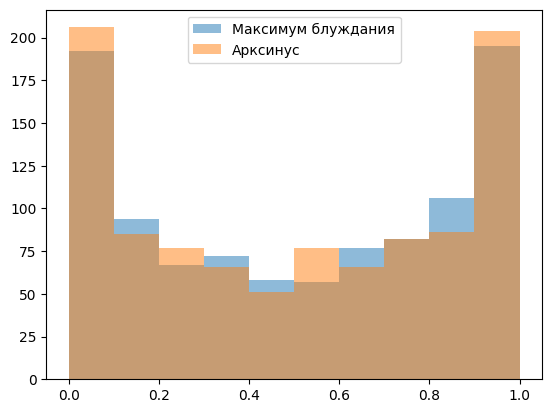

In [ ]:
def walk(n):
  S = []
  f = lambda x: (7/6)*1/x**(13/6)
  for i in range(n):
    y = np.random.uniform(1, 10**6)
    if np.random.binomial(n = 1, p = f(y)) == 0:
      eps = y
    r = np.random.binomial(1, 1/2)
    if r == 1:
      delta  = 1
    else :
      delta  = -1
    S.append(eps*delta)
  for i in range(1, n):
    S[i] += S[i-1]
  return S
n = 100
t = np.linspace(0, 1, n)
S1 = walk(n)
plt.title("Траектория процесса N(0, 1)")
plt.plot(t, S1)
plt.show()

T1 = []
m = 1000
for i in range(m):
  S = []
  S = walk(n)
  T1.append(t[S.index(max(S))])
plt.hist(T1, alpha = 0.5)
plt.hist(ss.arcsine.rvs(0, 1, m), alpha = 0.5)
plt.legend(('Максимум блуждания', 'Арксинус'))
Time = ss.arcsine.rvs(0.01, 1, 1000)
#Time = list(map(lambda x: x + abs(ss.norm.rvs(0, 0.01)), Time))

[0.012987012987012988, 0.025974025974025976, 0.03896103896103896, 0.05194805194805195, 0.06493506493506493, 0.1038961038961039, 0.15584415584415584, 0.16883116883116883, 0.19480519480519481, 0.22077922077922077, 0.2857142857142857, 0.4025974025974026, 0.8961038961038961, 0.948051948051948, 0.987012987012987]
[0.012987012987012988, 0.03896103896103896, 0.06493506493506493, 0.15584415584415584, 0.19480519480519481, 0.2857142857142857, 0.8961038961038961, 0.987012987012987]
0.2727272727272728


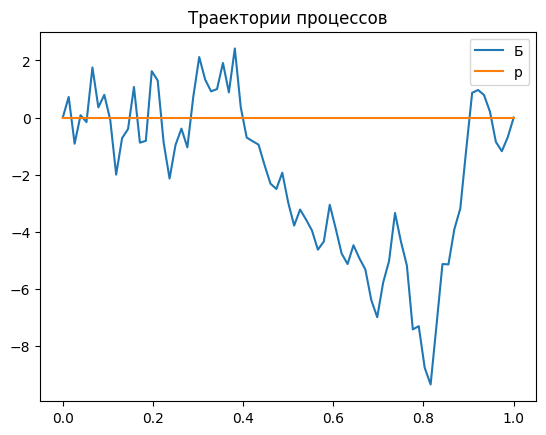

In [ ]:
#4*#

n = 100
t = np.linspace(0, 1, n)
B = [0]
for i in range(n-1):
  B.append(B[-1] + ss.norm.rvs(0, 1))
plt.title("Траектории процессов")
#plt.plot(t, B)


x0 = []
for i in range(1, n):
  if (B[i-1]<= 0 and B[i] >= 0) or (B[i-1]>= 0 and B[i] <= 0):
    x0.append(i)
t0 = max(x0)


x1 = []
for i in range(1, n):
  if (B[i-1]<= 0 and B[i] >= 0):
    x1.append(i)

#print(list(map(lambda x: x/n, x0)))
#print(list(map(lambda x: x/n, x1)))
#print(t0/n)


B0=[]
for i in range(t0):
  B0.append(B[i])
B0.append(0)
t1 = np.linspace(0, 1, t0+1)
c = 1/t[t0]


x0 = []
for i in range(1, len(B0)):
  if (B0[i-1]<= 0 and B0[i] >= 0) or (B0[i-1]>= 0 and B0[i] <= 0):
    x0.append(i)
t0 = max(x0)


x1 = []
for i in range(1, len(B0)):
  if (B0[i-1]<= 0 and B0[i] >= 0):
    x1.append(i)

print(list(map(lambda x: x/(t0+1), x0)))
print(list(map(lambda x: x/(t0+1), x1)))


time = 0
for i in range(len(x1)-1):
  j = x0.index(x1[i])
  time += x0[j+1]/(t0+1) - x0[j]/(t0+1)
print(time)

B0 = list(map(lambda x: math.sqrt(c)*x, B0))
plt.plot(t1, B0)
plt.plot(t1, [0]*len(t1))
plt.legend(("Броуновский мост"))


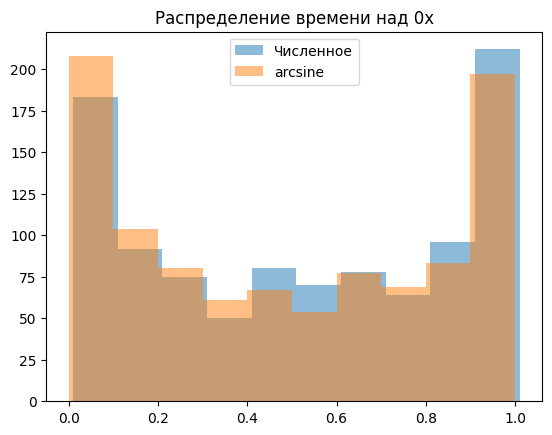

In [ ]:
def time_up(n):

  B = [0]
  time = 0
  t = np.linspace(0, 1, n)
  for i in range(n-1):
    B.append(B[-1] + ss.norm.rvs(0, 1)) #создание броуновского движения#

  x0 = [] #ищем нули#
  for i in range(1, n):
    if (B[i-1]<= 0 and B[i] >= 0) or (B[i-1]>= 0 and B[i] <= 0):
      x0.append(i)
  t0 = max(x0) #нашли последний#

  B0=[] #строим мост#
  for i in range(t0):
    B0.append(B[i])
  B0.append(0)
  c = 1/t[t0]

  x0 = []#нули моста#
  for i in range(1, len(B0)):
    if (B0[i-1]<= 0 and B0[i] >= 0) or (B0[i-1]>= 0 and B0[i] <= 0):
      x0.append(i)
  t0 = max(x0)


  x1 = []
  for i in range(1, len(B0)):
    if (B0[i-1]<= 0 and B0[i] >= 0):
      x1.append(i)

  for i in range(len(x1)-1):
    j = x0.index(x1[i])
    time += x0[j+1]/(t0+1) - x0[j]/(t0+1)

  return time


n = 100
m = 1000
Timе = []
for i in range(m):
  Timе.append(time_up(n))
plt.title("Распределение времени над 0x")
plt.hist(Time, alpha = 0.5)
plt.hist(ss.arcsine.rvs(0, 1, m), alpha = 0.5)
plt.legend(('Численное','arcsine'))#закон арксинуса леви#